3. 3차원 합성곱 연산: 칼라 아미지에서 특징을 추출하는 feature map 생성  
- 이론만 이해 conv 함수 -> 공부한 것
- 코드 구현 이해: (for 문 3개 사용) -> 결과 산출물( 일했다 )  

<br>

입력 이미지: 이미지  
↓  <br>
합성곱 층: 이미지 형상을 유지  
&emsp; &emsp; &emsp;&ensp;&ensp;&nbsp;한장의 사진을 가지고 여러개의 비슷한 사진들( Feature map )을 만들어 내는 역할  
↓  <br>
완전 연결 계층: 분류를 하는 계층  


4. 패딩  
- 패딩이란 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값으로 채워 늘리는 것을 패딩이라고   
- 패딩을 하지 않을 경우 data의 공간의 크기는 합성곱 계층을 지날 때 마다 작아지게 되므로 가장자리 정보들이 사라지게 되는 문제가 발생하게 됨
- 이런 이유로 패딩을 해야 함
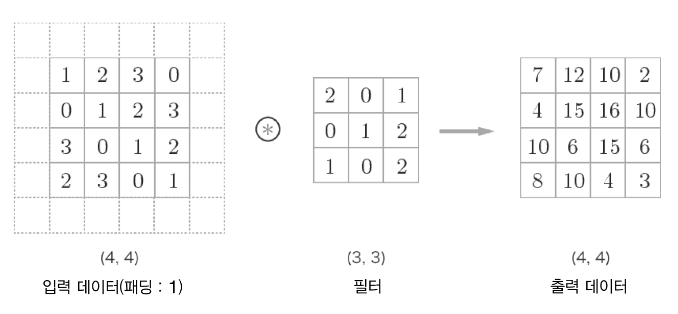  
예제 1. 아래의 2X2의 행렬을 제로 패딩해서 4X4행렬로 만드시오  
	$$\begin{pmatrix} 18 & 19  \\ 9 & 18 \end{pmatrix}     \Longrightarrow
    \begin{pmatrix} 0 & 0 & 0 & 0  \\ 0 & 9 & 18 & 0 \\ 0&18&9&0\\0&0&0 & 0  \end{pmatrix}$$

In [1]:
import numpy as np

x = np.array( [ [ 18, 19 ], [ 9, 18 ] ])
x_pad = np.pad(x, pad_width=1, mode = 'constant', constant_values=0)
print(x_pad)

[[ 0  0  0  0]
 [ 0 18 19  0]
 [ 0  9 18  0]
 [ 0  0  0  0]]


문제 133. 아래의 행렬을 제로패딩 1한 후의 결과를 확인하시오  
	$$\begin{pmatrix} 2 & 0 & 1  \\ 6 & 7 &3 \\4&5&2 \end{pmatrix}$$

In [5]:
x2 = np.array( [ 2, 0, 1 ,6, 7, 3 ,4, 5, 2 ]).reshape(3, 3)
x2_pad = np.pad(x2, pad_width=1, mode='constant', constant_values = 0)
print(x2_pad)

[[0 0 0 0 0]
 [0 2 0 1 0]
 [0 6 7 3 0]
 [0 4 5 2 0]
 [0 0 0 0 0]]


패딩을 사용해서 우리가 하고자 하는 것은?  
- 원본 이미지를 convolution 층을 지날 때 마다 계속 같은 형상으로 유지시키는 것  
원본 입력 이미지  
↓  <br>
컨볼루션 층: convolution --> padding  
↓  <br>
원본이미지와 행과 열이 같은 이미지  

원본 입력이미지와 같은 형상 ( 행과 열 )으로 피쳐맵이 출력되기 위해서는 패딩을 몇을 줘야 하는가?  
파이썬 날코딩: padding = ? ( 개발자가 직접 계산해줘야 한다 )  
텐서플로우 코디: padding = same  

<br>

<계산 공식>   
$$ p = \frac{(OH - 1) \times S - H + FH}{2} = \frac{(4 - 1) \times 1 - 4 + 3}{2}=1$$
OH = 출력 이미지의 세로  
OW = 출력 이미지의 가로  
H &nbsp; = 입력 이미지의 세로  
W &nbsp;= 입력 이미지의 가로  
FH = 필터의 세로  
FW = 필터의 가로

# 스트라이드

- 합성곱할 때 원본 이미지를 필터로 이동하면서 피쳐맵을 생성하는 과정
- 이동을 몇 칸으로 할지를 결정하는 것  
Convolution 층 구현 텐써플로우 2.0
~~~
               필터의 사이즈(가로, 세로)             입력층의 뉴런의 갯수
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
             뉴런의 갯수   입력이미지와 출력이미지의 사이즈를 동일화
~~~
파이썬 날코딩  
~~~
conv_params = {'filter_num':30, 'filter_size': 5, 'pad': 계산(보통 1or2), 'stride':1}
~~~

※ Convolution 층에서 하는 작업은 원본 이미지를 가지고 여러개의 비슷한 이미지를 만들어내는 작업 비슷한 이미지를 만들어내는 작업  
비슷한 이미지들이 바로 feature map  
그리고 이 feature map의 갯수는 필터 사이즈와 동일하게 생성됨  
아래와 같이 convolution 층을 구성했으면 생성되는 feature map의 갯수는?  
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))  
답: 필터의 갯수(=뉴런의 갯수)가 32개이므로 이미지 한장에 대해서 피쳐맵의 갯수도 32개가 됨  
그런데 신경망에 이미지를 학습 시킬때 한장씩 학습시키지 않고 배치 단위로 100장씩 한꺼번에 넣어서 학습 시킨다.  

100장 ----> convolution ----> 피쳐맵의 갯수 => 3200장   
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))  

설현 사진 RGB 컬러 사진1장을 RGB 필터로 합성곱해서 1개의 feature map을 출력하는 그림  
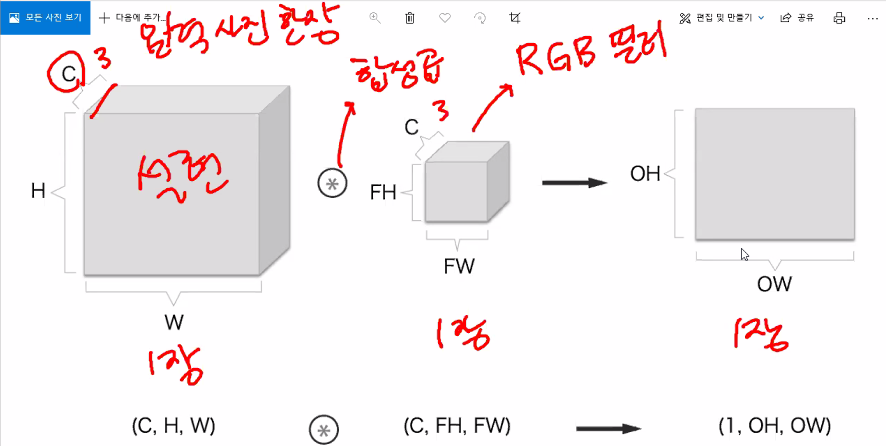  

설현 사진 1장에 필터 FN개를 합성곱 하고 FN개의 feature map을 출력하는 그림  
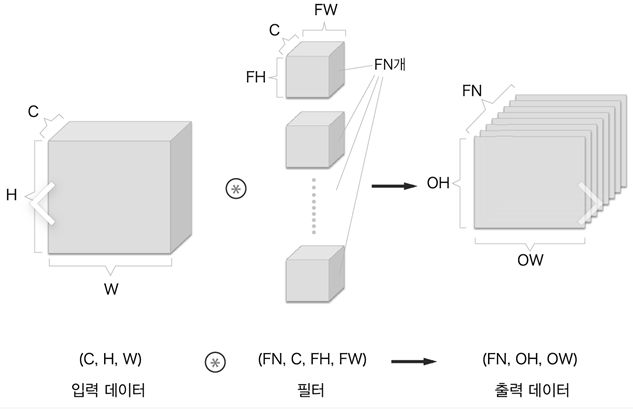

설현 사진 1장에 필터 FN개를 합성곱하고 FN의 편향을 더해서 FN개의 피쳐맵을 출력하는 그림
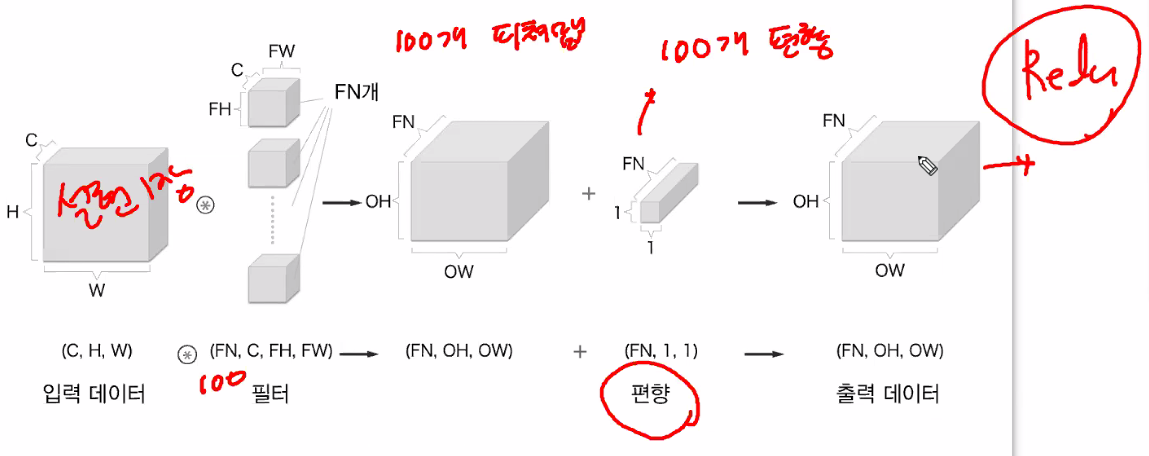  

한장씩 신경망에 넣고 학습을 시키면 너무 느리기 때문에 100장씩 넣고 학습시키면 아래와 같은 그림이 됨  
미니 배치 갯수가 N개 만큼 설현사진을 입력해서 필터 FN개와 합성곱하여 미니배치 갯수 N개 만큼 feature map을 출력하는 그림
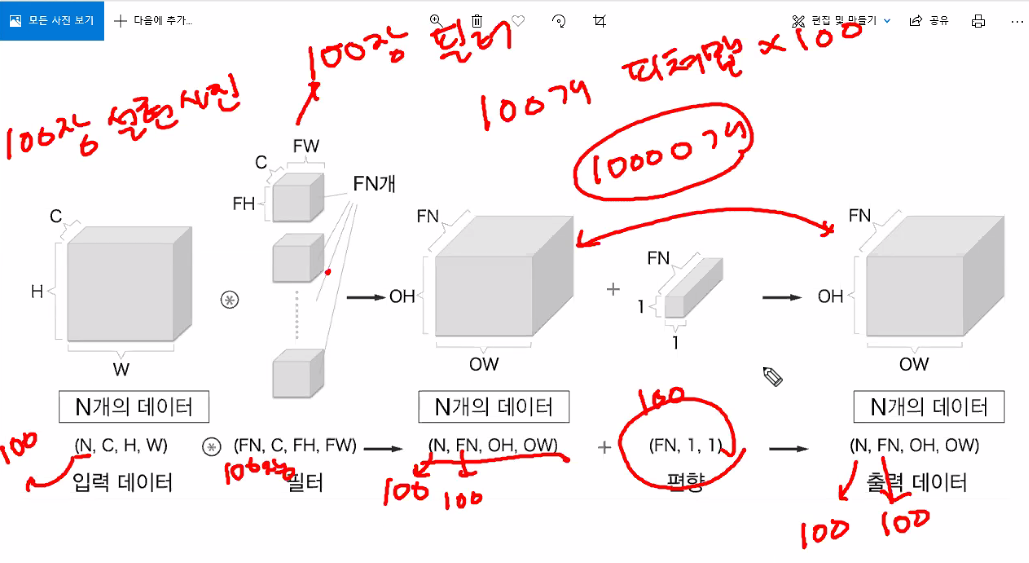

정리: RGB 설현사진 1장을 100개의 RGB필터로 합성곱하면 100개의 피쳐맵이 생기는데 100개의 설현사진이 100개의 RGB 필터와 각각 합성곱하면 설현사진 1장 당 피쳐맵이 100개가 생성되므로 설현사진이 100장일 경우 피쳐맵이 10000장이 됨

합성곱 계층을 이해하기 위한 im2col함수를 사용하는 단계  

im2col함수가 convoltion층에서 사용되고 있는데 이 함수의 역할은?  

배치 단위의 원본 이미지 -----> 신경망  
( 설현사진 100장 )  
4차원 ( 100, 3, 32, 32 )  
4차원 데이터를 그대로 입력하면 컴퓨터가 합성곱을 계산하는데 시간이 너무 많이 걸린다.  
그래서 시간을 줄일려면 어떻게 해줘야 하는가? -> 코드를 변경해줘야 한다.  
4차원 ----> 2차원으로 변경  
2차원으로 계산해 나가면 가능  
   
예제 1. 가상의 사진 10장을 3차원 행렬로 만드시오

In [9]:
import numpy as np

x1 = np.random.rand(10, 3, 7, 7)
print(x1)
print(x1.shape)
print(x1.ndim)  # 차원 확인

[[[[0.74616514 0.5649568  0.44529325 ... 0.83824703 0.24489441
    0.11743105]
   [0.56554897 0.54412555 0.36746895 ... 0.77760726 0.53108677
    0.25701941]
   [0.6389905  0.51284295 0.71807223 ... 0.84240813 0.58178421
    0.20748878]
   ...
   [0.1210089  0.91196865 0.35028193 ... 0.94446009 0.44067144
    0.90378894]
   [0.01356823 0.99822156 0.53228133 ... 0.93185302 0.50835286
    0.40932284]
   [0.47116865 0.77822248 0.97800496 ... 0.44337247 0.59590214
    0.42095088]]

  [[0.0148443  0.93690176 0.18342687 ... 0.08539504 0.34228748
    0.01804355]
   [0.92510341 0.94186096 0.17328025 ... 0.63558849 0.67735101
    0.6179908 ]
   [0.73334364 0.7250176  0.4948595  ... 0.35259408 0.19624544
    0.05464472]
   ...
   [0.11278564 0.69869121 0.48696645 ... 0.34829823 0.76716521
    0.7483087 ]
   [0.89859382 0.3667473  0.99814212 ... 0.79755821 0.07169574
    0.10421863]
   [0.13869457 0.43834933 0.29052191 ... 0.96976917 0.49873166
    0.87640519]]

  [[0.16180395 0.22812104 0.146649

In [12]:
# 예제 3. 가상의 사진 10장을 im2col 함수에 넣어서 2차원 행렬로 변환하시오
#     4차원 ------------> 2차원
# (10, 3, 7, 7)         (90, 75)
import numpy as np

def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

x1 = np.random.rand(10, 3, 7, 7)
col = im2col(x1, 5, 5, stride=1, pad=0)
print(col.shape)

(90, 75)


im2col 함수: 신경망에서 합성곱을 진행하는 데 입력되는 4차원 데이터를 2차원 데이터로 차원 축소해서 2차원 필터와 내적해서 합성곱하게 만드는 함수

~~~
model.add(Conv2D(32, (3, 3))) <- 여기서 일어나는 일을 설명
 3x3의 필터 32개를 원본 이미지 (100, 3, 32, 32)합성곱을 해서 여러개 (32x100개)의 피쳐맵을 생성한다.
 
 im2col 함수는 4차원 --> 2차원으로 변경하는 역할을 한다.
 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
~~~

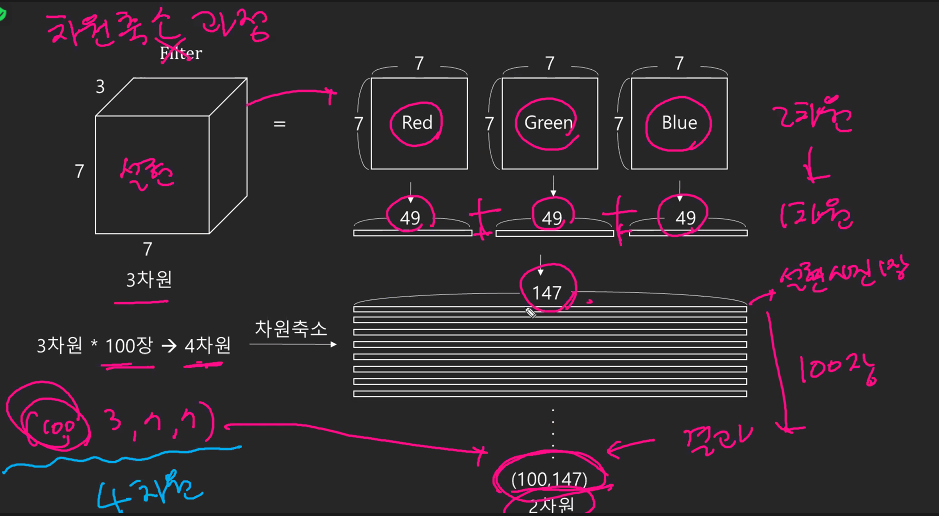

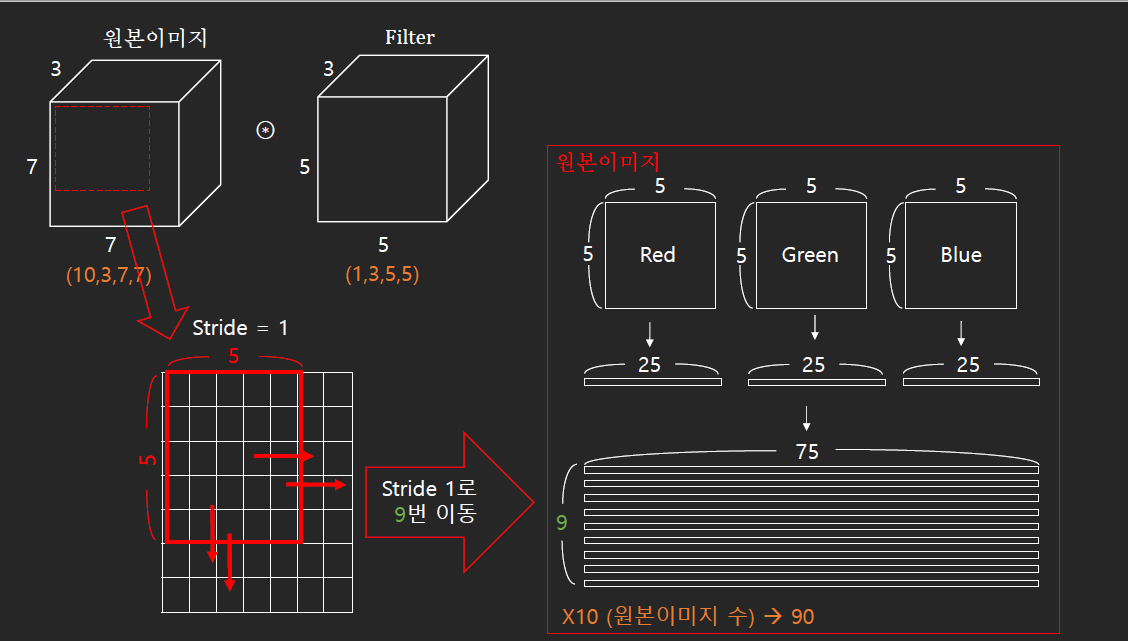

# 4차원 필터를 2차원으로 변경하는 방법
예제 1. 아래의 5x5행렬의 RGB 필터 10개를 3차원으로 변경하시오  
( 10, 3, 5, 5 ) -----> ( 10, 3, 25 (5x5) )  

In [14]:
import numpy as np
filter = np.random.rand(10, 3, 5, 5) # 4차원 필터 생성
print( filter.reshape(10, 3, -1).shape )

(10, 3, 25)


사진이나 필터나 둘 다 4차원인데 사진만 im2col을 써야 하는 이유  
-> 필터는 그냥 2차원으로 reshape만 하면 되지만 원본 이미지는 필터 사이즈에 맞춰서 2차원으로 reshape해야 하기 때문

예제 2. 아래의 4차원 행렬을 2차원 행렬로 변경하시오
( 10, 3, 5, 5 ) -----> ( 10, 75 )

In [17]:
import numpy as np
filter = np.random.rand(10, 3, 5, 5)
print(filter.reshape(10, -1).shape)

(10, 75)


지금까지의 내용을 정리하면?  
1. 원본이미지 ---im2col---> 2차원
2. 필터 ---reshape의 -1---> 2차원

# 풀링(pooling)층의 역할
원본 이미지  
↓  <br>
Conv: 원본 이미지의 특징을 잡아내는 피쳐맵을 필터의 갯수에 맞춰 생성하는 층  
↓  <br>
Relu: 필요한 정보와 필요하지 않는 정보를 구분하는 층  
↓  <br>
Pooling: convolution층이 망쳐놓은 그림들을 가지고 피쳐맵 이미지의 각 부분에서 대표값들을 뽑아 사이즈가 작은 이미지를 만드는 역할( 이미지가 선명해짐 )  
↓  <br>
fully connected  

풀링층의 역할: convolution 층이 이미지의 특징을 잡아내는 역할을 한다면 pooling층은 feature map의 이미지를 선명하게 만드는 역할을 한다.
" 출력값에서 일부분만 취하는 기능 "  
마치 사진을 축소하면 해상도가 좋아지는 듯한 효과와 비슷하다  
< 텐서플로우 pooling 코드 >
~~~
model.add(MaxPooling2D(pool_size=(2, 2)))
~~~
풀링(pooling)의 종류의 3가지  
1. 최대 풀링: 
convolution 데이터에서 가장 큰 값을 대표값으로 선정  
효과: 이미지를 선명하게 만드는 효과  
2. 평균 풀링:  
convolution 데이터에서 모든 값의 평균값을 대표값으로 선정  
효과: 이미지를 부드럽게 하는 효과
3. 확률적 풀링:
convolution 데이터에서 임의 확률로 한개를 선정  

예제 1. 파이썬으로 아래의 행렬을 만드시오
$$\begin{pmatrix} 21 & 8 & 8 &12  \\ 12 & 19 & 9 &7 \\8&10&4&3 \\ 18 & 12 & 9 & 10 \end{pmatrix}$$

In [18]:
x = np.array([21, 8, 8, 12, 12, 19, 9, 7, 8, 10, 4, 3, 18, 12, 9, 10]).reshape(4, 4)
print(x)

[[21  8  8 12]
 [12 19  9  7]
 [ 8 10  4  3]
 [18 12  9 10]]


예제 2. stride 2를 기준으로 maxpooling한 결과를 출력하시오

$$\begin{pmatrix} 21 & 8 & 8 &12  \\ 12 & 19 & 9 &7 \\8&10&4&3 \\ 18 & 12 & 9 & 10 \end{pmatrix}  \Longrightarrow \begin{pmatrix} 21&12 \\ 18 & 10 \end{pmatrix} $$

In [25]:
import numpy as np

x = np.array([21, 8, 8, 12, 12, 19, 9, 7, 8, 10, 4, 3, 18, 12, 9, 10]).reshape(4, 4)
x2 = x.reshape(1, 1, 4, 4) # 4차원 데이터
a = im2col(x2, 2, 2, 2, 0)
print(a, '\n')
b = np.max(a, axis = 1)
print(b.reshape(2, 2))

[[21.  8. 12. 19.]
 [ 8. 12.  9.  7.]
 [ 8. 10. 18. 12.]
 [ 4.  3.  9. 10.]] 

[[21. 12.]
 [18. 10.]]


# 설현과 수지를 구분하는 신경망 코드

- 사진이 있는 resize폴더를 c드라이브 밑에 gimages2에 둠
- loader9.py를 주피터 워킹 디렉토리(홈디렉토리)에 가져다 둠  
  
사진은 1~600: 설현. 601 ~ 1200: 수지

In [28]:
import os
import re
import cv2
import numpy as np
import csv
import random

train_image= 'C:\\gimages2\\resize\\'
train_label = 'C:\\gimages2\\train_label.csv'


#2. 필요한 모듈을 임폴트 한다. 
import loader9
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Activation
from sklearn.model_selection import train_test_split

#3. 하이퍼 파라미터를 설정한다. 
batch_size = 28
num_classes = 2
epochs = 100

#4. 데이터 로드 
x_train = loader9.image_load(train_image) # 이미지를 numpy array형 숫자로 변환
y_train = loader9.label_load(train_label) # csv파일 읽어와서 one hot encoding

print ( loader9.image_load(train_image).shape )
print ( loader9.label_load(train_label).shape)

(1230, 128, 128, 3)
(1230, 2)


In [29]:
#5. 훈련 데이터의일부를 validation데이터로 구성함 ( 훈련 70%, 검정 30% )
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

#6. 모델 구성 
model = Sequential()
# 첫번째 층은 반드시 input_shape 를 지정해야한다. 
#  x_train.shape (1230, 128, 128, 3)
# input_shape=x_train.shape[1:] (128, 128, 3) 
# mnist 와 비교하면 mnist 의 경우는 첫층이 완전연결계층이므로 
# Flatten 시켜서  Flatten(input_shape=(28,28) ) 이렇게 입력했었고
# Convolution 층은 이미지의 형상이 무시되지 않도록 입력해야하기 때문에 
# (128, 128, 3)  이렇게 3차원으로 넣어야한다. 

# Convolution 1층
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Convolution 2층
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolution 3층
model.add(Conv2D(64, (3, 3), padding='same')) # 필터의 갯수 64
model.add(BatchNormalization())
model.add(Activation('relu'))

# Convolution 4층
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 완전 연결 계층 1층
model.add(Flatten())  # 완전 연결 계층에 입력할 때는 flatten 시켜야 함
model.add(Dense(512)) # 완전 연결 계층 1층의 뉴런의 갯수를 512개로 설정
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

#출력층
model.add(Dense(num_classes))  # 출력층의 뉴런의 갯수를 설정(num_classes = 2)
model.add(Activation('softmax'))
 
# 모델 설정 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# 데이터 정규화 
x_train = x_train.astype('float32') # 실수형으로 숫자를 다 변환시킨다.
x_train /= 255 # 255으로 숫자를 다 나눠서 0~1사이의 숫자로 변환 # 255으로 숫자를 다 나눠서 0~1사이의 숫자로 변환

# 모델 학습 
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
 
# 모델 평가 
scores = model.evaluate(x_train, y_train, verbose=0)

#[0.3352026641368866, 0.9929999709129333]
#    오차                        정확도 

print("CNN Error: %.2f%%" % (100-scores[1]*100))
 
save_model(model, "C:\\gimages2\\leaf9.h5") # 모델을 저장(pickle 파일 생성과 같음)

Epoch 1/100
31/31 [==============================] - 47s 1s/step - loss: 1.7034 - accuracy: 0.5217 - val_loss: 51.7304 - val_accuracy: 0.5203
Epoch 2/100
31/31 [==============================] - 44s 1s/step - loss: 0.8045 - accuracy: 0.5904 - val_loss: 98.7432 - val_accuracy: 0.4688
Epoch 3/100
31/31 [==============================] - 45s 1s/step - loss: 0.6538 - accuracy: 0.6771 - val_loss: 13.9611 - val_accuracy: 0.4905
Epoch 4/100
31/31 [==============================] - 46s 1s/step - loss: 0.4825 - accuracy: 0.8016 - val_loss: 37.8780 - val_accuracy: 0.5312
Epoch 5/100
31/31 [==============================] - 46s 1s/step - loss: 0.3856 - accuracy: 0.8406 - val_loss: 24.8934 - val_accuracy: 0.5366
Epoch 6/100
31/31 [==============================] - 45s 1s/step - loss: 0.2772 - accuracy: 0.8735 - val_loss: 76.5884 - val_accuracy: 0.5122
Epoch 7/100
31/31 [==============================] - 44s 1s/step - loss: 0.1881 - accuracy: 0.9300 - val_loss: 72.5158 - val_accuracy: 0.5312
Epoch 

31/31 [==============================] - 44s 1s/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 298.6133 - val_accuracy: 0.5014
Epoch 59/100
31/31 [==============================] - 44s 1s/step - loss: 0.0573 - accuracy: 0.9772 - val_loss: 647.5402 - val_accuracy: 0.4715
Epoch 60/100
31/31 [==============================] - 44s 1s/step - loss: 0.0249 - accuracy: 0.9911 - val_loss: 1289.8793 - val_accuracy: 0.4661
Epoch 61/100
31/31 [==============================] - 44s 1s/step - loss: 0.0228 - accuracy: 0.9912 - val_loss: 284.0494 - val_accuracy: 0.5014
Epoch 62/100
31/31 [==============================] - 45s 1s/step - loss: 0.0175 - accuracy: 0.9961 - val_loss: 323.5914 - val_accuracy: 0.4959
Epoch 63/100
31/31 [==============================] - 44s 1s/step - loss: 0.0272 - accuracy: 0.9930 - val_loss: 316.1624 - val_accuracy: 0.4905
Epoch 64/100
31/31 [==============================] - 45s 1s/step - loss: 0.0378 - accuracy: 0.9899 - val_loss: 362.3814 - val_accuracy: 0.4851
Epoc